___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [3]:
pip install  pyforest

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
  pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pyforest
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

import pyforest
# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier,LogisticRegressionCV
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier 

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

from sklearn.impute import SimpleImputer

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [7]:
Male = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1")


In [8]:
Female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq",encoding="latin-1")

In [9]:
Male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [10]:
Female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,...,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,...,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,...,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,...,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,...,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right ha

In [11]:
Male.columns == Female.columns
# SubjectId == subjectId

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
Female.rename(columns={"SubjectId":"subjectid"},inplace=True)

In [13]:
Male.shape, Female.shape

((4082, 108), (1986, 108))

In [14]:
Male.columns == Female.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [15]:
df = pd.concat([Male,Female], axis=0, ignore_index=True)

In [16]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [17]:
df.shape, Female.shape, Male.shape

((6068, 108), (1986, 108), (4082, 108))

## Explore Data

In [18]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [19]:
df.info(verbose=True)
# verbose=True is used in order to print the full summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [20]:
df.isnull().sum()
#Ethnicity = 4647

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [21]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [22]:
missing(df)[:2]

,Missing_Number,Missing_Percent
Ethnicity,4647,0.765821
subjectid,0,0.000000


In [23]:
# More than half of the Ennicity data is missing. Therefore I drop it
df.drop(['Ethnicity'], axis=1, inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation',
       'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=107)

In [26]:
df.DODRace.value_counts()
# target column is DODRace

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

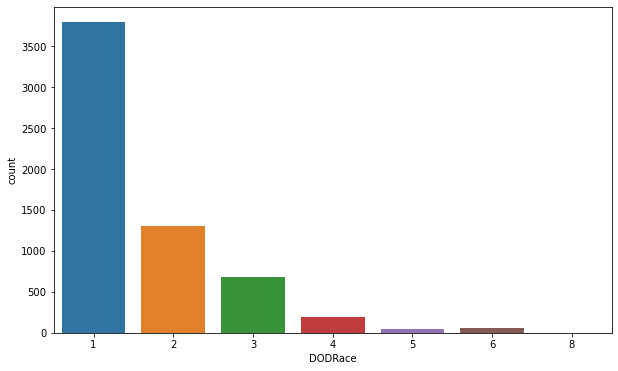

In [27]:
sns.countplot(df.DODRace);

In [28]:
df.DODRace.value_counts()>500
# Dropping the races that are less than 500 counts

1     True
2     True
3     True
4    False
6    False
5    False
8    False
Name: DODRace, dtype: bool

In [29]:
df = df[df.DODRace.isin([1,2,3])]

In [30]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [31]:
df.Gender.value_counts()

Male      3899
Female    1870
Name: Gender, dtype: int64

In [32]:
df.Gender = [1 if i == "Male" else 0 for i in df.Gender]

In [33]:
df.Gender.value_counts()
# 1 = Male
# 0 = Female

1    3899
0    1870
Name: Gender, dtype: int64

In [34]:
df.sample(3)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
4365,15012,177,1318,308,207,1226,226,183,356,266,245,422,65,302,274,132,934,203,819,560,464,328,1380,249,864,225,1155,774,560,378,32,62,20,224,751,88,247,300,235,454,425,1015,78,189,174,145,564,189,306,59,...,494,440,72,357,107,306,333,1324,108,385,238,953,332,137,866,777,532,1636,1616,1307,1044,546,148,728,429,134,825,1500,407,258,697,168,344,975,529,158,766,0,21-Mar-11,Camp Atterbury,Army National Guard,Combat Support,31B,Indiana,1,1,23,64,120,Right hand
1354,14995,249,1470,324,233,1335,258,199,408,361,278,522,74,346,327,149,1058,255,869,617,497,398,1516,294,1117,283,1278,833,623,364,34,66,23,273,813,104,280,346,305,594,488,1132,87,213,198,161,589,203,346,76,...,555,495,72,422,123,411,453,1472,116,432,272,1177,352,136,935,870,586,1802,1763,1447,1103,627,182,780,472,135,881,1730,482,352,979,230,415,1049,908,178,878,1,21-Mar-11,Camp Atterbury,Army National Guard,Combat Arms,11B,Indiana,1,1,32,70,197,Right hand
2383,22114,268,1447,325,223,1335,247,208,393,342,255,484,74,330,320,138,983,232,902,624,516,388,1528,288,1082,261,1307,835,601,359,33,64,20,252,805,97,272,343,314,573,473,1157,89,219,181,144,558,196,343,74,...,548,504,78,405,122,391,421,1351,113,427,265,1131,349,146,914,887,567,1783,1757,1458,1117,591,172,844,469,129,919,1627,480,324,953,254,415,1056,837,182,876,1,16-Aug-11,Fort Stewart,Army National Guard,Combat Service Support,91E,Canada,1,1,38,70,190,Right hand


In [35]:
df.drop(columns=["Date","subjectid","Component","SubjectNumericRace","SubjectsBirthLocation","Branch","PrimaryMOS","WritingPreference","Installation"],axis=1,inplace=True)


In [36]:
df.drop(["axillaheight","cervicaleheight","chestheight","kneeheightsitting","suprasternaleheight","stature","stature","tenthribheight","waistheightomphalion","wristheight","trochanterionheight"],axis=1,inplace=True)

In [37]:
df.head(3)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,weightkg,wristcircumference,Gender,DODRace,Age,Heightin,Weightlbs
0,266,1467,337,222,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,291,1074,259,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,610,164,786,491,140,1700,501,329,933,240,440,815,175,1,1,41,71,180
1,233,1395,326,220,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,269,1021,253,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,572,169,822,476,120,1627,432,316,870,225,371,726,167,1,1,35,68,160
2,287,1430,341,230,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,288,1120,267,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,685,198,807,477,125,1678,472,329,964,255,411,929,180,1,2,42,68,205


In [38]:
df.shape

(5769, 88)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [39]:
X = df.drop(columns="DODRace")
y= df.DODRace

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4038, 87)
Train target shape   :  (4038,)
Test features shape  :  (1731, 87)
Test target shape    :  (1731,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [42]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set_Scores","\n----------------")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set_Scores","\n----------------")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set_Scores 
----------------
[[1087   15   22]
 [  39  356    5]
 [ 126   23   58]]
              precision    recall  f1-score   support

           1       0.87      0.97      0.91      1124
           2       0.90      0.89      0.90       400
           3       0.68      0.28      0.40       207

    accuracy                           0.87      1731
   macro avg       0.82      0.71      0.74      1731
weighted avg       0.85      0.87      0.85      1731


Train_Set_Scores 
----------------
[[2590   31   47]
 [  70  808   20]
 [ 284   50  138]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92      2668
           2       0.91      0.90      0.90       898
           3       0.67      0.29      0.41       472

    accuracy                           0.88      4038
   macro avg       0.82      0.72      0.75      4038
weighted avg       0.86      0.88      0.86      4038



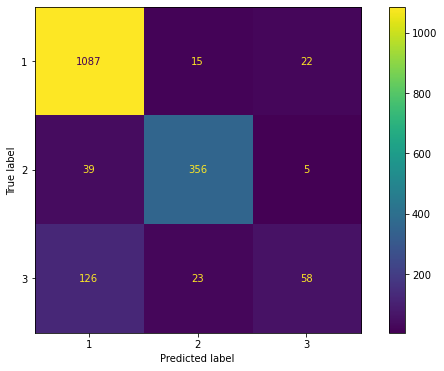

In [46]:
plot_confusion_matrix(log_model, X_test, y_test);

### Logistic Model GridsearchCV

In [47]:
model = LogisticRegression()
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'accuracy', 'precision_weighted',
                            'recall_weighted', 'f1_weighted'
                        ],
                        cv=10)

In [48]:
pd.DataFrame(scores, index=range(1, 11))

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.176616,0.002993,0.858911,0.850995,0.858911,0.832371
2,0.196247,0.002990,0.863861,0.845539,0.863861,0.843780
3,0.154097,0.002992,0.871287,0.862079,0.871287,0.853795
4,0.173536,0.003989,0.881188,0.861089,0.881188,0.857678
5,0.168550,0.004986,0.886139,0.877203,0.886139,0.874632
6,0.183845,0.002993,0.839109,0.818883,0.839109,0.823468
7,0.140623,0.002992,0.876238,0.865030,0.876238,0.864022
8,0.155585,0.003989,0.851485,0.828336,0.851485,0.833350
9,0.120678,0.002991,0.861042,0.841524,0.861042,0.839477
10,0.152592,0.004987,0.880893,0.872118,0.880893,0.860617


In [49]:
params = {"C" : np.logspace(1,10,20),
          "l1_ratio" : [0.01,0.1,0.2,0.5,1],
          "penalty" : ["l1","l2"]}
log_mod_grid = GridSearchCV(model,param_grid=params , scoring = "recall_micro" ,n_jobs = -1,cv=10)

In [50]:
log_mod_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+01, 2.97635144e+01, 8.85866790e+01, 2.63665090e+02,
       7.84759970e+02, 2.33572147e+03, 6.95192796e+03, 2.06913808e+04,
       6.15848211e+04, 1.83298071e+05, 5.45559478e+05, 1.62377674e+06,
       4.83293024e+06, 1.43844989e+07, 4.28133240e+07, 1.27427499e+08,
       3.79269019e+08, 1.12883789e+09, 3.35981829e+09, 1.00000000e+10]),
                         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 1],
                         'penalty': ['l1', 'l2']},
             scoring='recall_micro')

In [51]:
log_mod_grid.best_params_

{'C': 10.0, 'l1_ratio': 0.01, 'penalty': 'l2'}

In [52]:
eval_metric(log_mod_grid, X_train, y_train, X_test, y_test)

Test_Set_Scores 
----------------
[[1076   17   31]
 [  28  361   11]
 [ 118   21   68]]
              precision    recall  f1-score   support

           1       0.88      0.96      0.92      1124
           2       0.90      0.90      0.90       400
           3       0.62      0.33      0.43       207

    accuracy                           0.87      1731
   macro avg       0.80      0.73      0.75      1731
weighted avg       0.85      0.87      0.86      1731


Train_Set_Scores 
----------------
[[2563   37   68]
 [  55  818   25]
 [ 240   53  179]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      2668
           2       0.90      0.91      0.91       898
           3       0.66      0.38      0.48       472

    accuracy                           0.88      4038
   macro avg       0.82      0.75      0.77      4038
weighted avg       0.87      0.88      0.87      4038



## 2. SVC

### Vanilla SVC model 

In [53]:
svm_model = SVC(class_weight="balanced",random_state=42)

In [54]:
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [55]:
eval_metric(svm_model,X_train, y_train, X_test, y_test)

Test_Set_Scores 
----------------
[[915  17 192]
 [ 17 361  22]
 [ 62  22 123]]
              precision    recall  f1-score   support

           1       0.92      0.81      0.86      1124
           2       0.90      0.90      0.90       400
           3       0.36      0.59      0.45       207

    accuracy                           0.81      1731
   macro avg       0.73      0.77      0.74      1731
weighted avg       0.85      0.81      0.82      1731


Train_Set_Scores 
----------------
[[2259   49  360]
 [  19  848   31]
 [  61   25  386]]
              precision    recall  f1-score   support

           1       0.97      0.85      0.90      2668
           2       0.92      0.94      0.93       898
           3       0.50      0.82      0.62       472

    accuracy                           0.87      4038
   macro avg       0.79      0.87      0.82      4038
weighted avg       0.90      0.87      0.88      4038



In [56]:
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

In [57]:
accuracy_score(y_test, y_pred_test)

0.8082033506643559

In [58]:
accuracy_score(y_train, y_pred_train)

0.8650321941555226

---------TEST SCORES-------------
              precision    recall  f1-score   support

           1       0.92      0.81      0.86      1124
           2       0.90      0.90      0.90       400
           3       0.36      0.59      0.45       207

    accuracy                           0.81      1731
   macro avg       0.73      0.77      0.74      1731
weighted avg       0.85      0.81      0.82      1731




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-------TRAIN SCORES---------
              precision    recall  f1-score   support

           1       0.97      0.85      0.90      2668
           2       0.92      0.94      0.93       898
           3       0.50      0.82      0.62       472

    accuracy                           0.87      4038
   macro avg       0.79      0.87      0.82      4038
weighted avg       0.90      0.87      0.88      4038



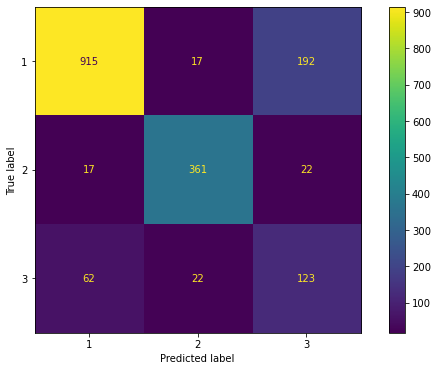

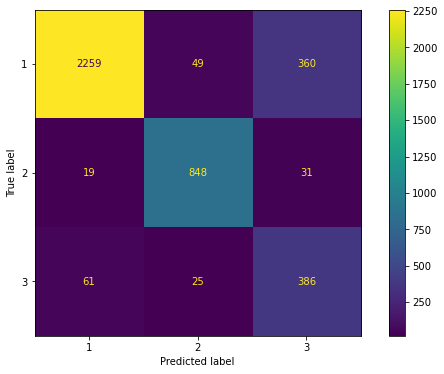

In [59]:
print("---------TEST SCORES-------------")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(svm_model, X_test, y_test)

print("\n" * 3, "-*" * 30)

print("-------TRAIN SCORES---------")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svm_model, X_train, y_train);

###  SVC Model GridsearchCV

In [60]:
param_grid = {'C': np.linspace(0.01, 1, 3),
              'gamma': [0.01,0.001]}
svm_model_grid = GridSearchCV(svm_model, param_grid, scoring = "f1_micro", n_jobs = -1)

In [61]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced', random_state=42), n_jobs=-1,
             param_grid={'C': array([0.01 , 0.505, 1.   ]),
                         'gamma': [0.01, 0.001]},
             scoring='f1_micro')

In [62]:
svm_model_grid.best_params_

{'C': 1.0, 'gamma': 0.01}

In [63]:
svm_model_grid.best_estimator_

SVC(class_weight='balanced', gamma=0.01, random_state=42)

In [64]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

---------TEST SCORES-------------
              precision    recall  f1-score   support

           1       0.91      0.70      0.79      1124
           2       0.85      0.84      0.85       400
           3       0.28      0.65      0.39       207

    accuracy                           0.72      1731
   macro avg       0.68      0.73      0.68      1731
weighted avg       0.82      0.72      0.76      1731




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-------TRAIN SCORES---------
              precision    recall  f1-score   support

           1       0.93      0.71      0.80      2668
           2       0.85      0.86      0.86       898
           3       0.29      0.66      0.40       472

    accuracy                           0.74      4038
   macro avg       0.69      0.74      0.69      4038
weighted avg       0.84      0.74      0.77      4038



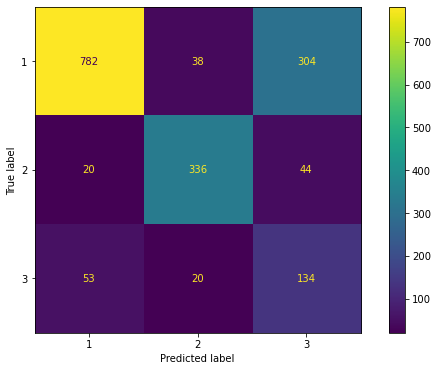

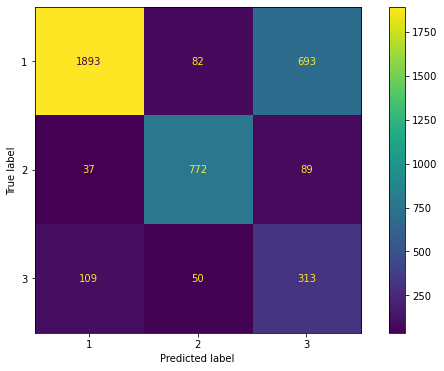

In [65]:
print("---------TEST SCORES-------------")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(svm_model_grid, X_test, y_test)

print("\n" * 3, "-*" * 30)

print("-------TRAIN SCORES---------")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svm_model_grid, X_train, y_train);

## 3. RF

### Vanilla RF Model

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set_Scores 
----------------
[[1104   16    4]
 [ 101  296    3]
 [ 178   22    7]]
              precision    recall  f1-score   support

           1       0.80      0.98      0.88      1124
           2       0.89      0.74      0.81       400
           3       0.50      0.03      0.06       207

    accuracy                           0.81      1731
   macro avg       0.73      0.59      0.58      1731
weighted avg       0.78      0.81      0.77      1731


Train_Set_Scores 
----------------
[[2668    0    0]
 [   0  898    0]
 [   0    0  472]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2668
           2       1.00      1.00      1.00       898
           3       1.00      1.00      1.00       472

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



In [69]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

---------TEST SCORES-------------
              precision    recall  f1-score   support

           1       0.80      0.98      0.88      1124
           2       0.89      0.74      0.81       400
           3       0.50      0.03      0.06       207

    accuracy                           0.81      1731
   macro avg       0.73      0.59      0.58      1731
weighted avg       0.78      0.81      0.77      1731




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
-------TRAIN SCORES---------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2668
           2       1.00      1.00      1.00       898
           3       1.00      1.00      1.00       472

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



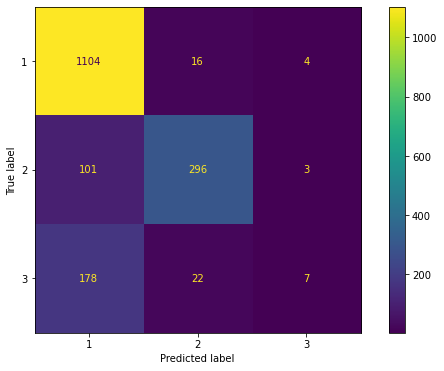

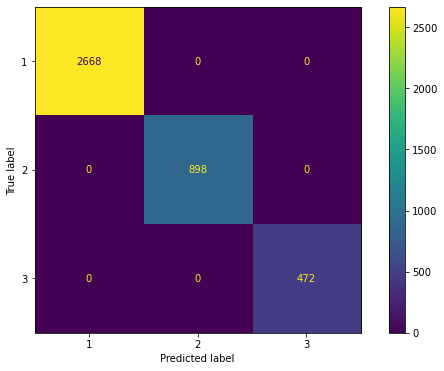

In [70]:
# alternative
print("---------TEST SCORES-------------")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf, X_test, y_test)

print("\n" * 3, "-*" * 30)

print("-------TRAIN SCORES---------")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf, X_train, y_train);

### RF Model GridsearchCV

In [71]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,12,14,16],
             'min_samples_split':[18,20,22],
             'class_weight': ['balanced',None]}

In [72]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [73]:
rf_grid_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 16,
 'min_samples_split': 20,
 'n_estimators': 200}

In [74]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [75]:
accuracy_score(y_test, y_pred_test)

0.8122472559214327

In [76]:
accuracy_score(y_train, y_pred_train)

0.9843982169390788

In [77]:
f1_score(y_test, y_pred_test, average='macro')

0.6601650923682231

In [78]:
f1_score(y_train, y_pred_train, average='macro')

0.9791527772448125

In [79]:
eval_metric(rf_grid_model,X_train, y_train, X_test, y_test)

Test_Set_Scores 
----------------
[[1044   44   36]
 [  75  318    7]
 [ 132   31   44]]
              precision    recall  f1-score   support

           1       0.83      0.93      0.88      1124
           2       0.81      0.80      0.80       400
           3       0.51      0.21      0.30       207

    accuracy                           0.81      1731
   macro avg       0.72      0.65      0.66      1731
weighted avg       0.79      0.81      0.79      1731


Train_Set_Scores 
----------------
[[2630   22   16]
 [  13  885    0]
 [   7    5  460]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2668
           2       0.97      0.99      0.98       898
           3       0.97      0.97      0.97       472

    accuracy                           0.98      4038
   macro avg       0.98      0.98      0.98      4038
weighted avg       0.98      0.98      0.98      4038



## 4. XGBoost

### Vanilla XGBoost Model

In [80]:
# pip install xgboost

In [81]:
from xgboost import XGBClassifier

In [82]:
# conda install -c conda-forge py-xgboost

In [83]:
# conda install -c anaconda py-xgboost

In [84]:
xgb = XGBClassifier()

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [86]:
xgb.fit(X_train, y_train)

[14:51:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [87]:
y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

In [88]:
eval_metric(xgb,X_train, y_pred_train, X_test, y_pred_test)

Test_Set_Scores 
----------------
[[1291    0    0]
 [   0  381    0]
 [   0    0   59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1291
           1       1.00      1.00      1.00       381
           2       1.00      1.00      1.00        59

    accuracy                           1.00      1731
   macro avg       1.00      1.00      1.00      1731
weighted avg       1.00      1.00      1.00      1731


Train_Set_Scores 
----------------
[[2668    0    0]
 [   0  898    0]
 [   0    0  472]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2668
           1       1.00      1.00      1.00       898
           2       1.00      1.00      1.00       472

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



### XGBoost Model GridsearchCV

In [89]:
param_grid = {"n_estimators":[100],'max_depth':[3,5,6], "learning_rate": [0.1, 0.3],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [90]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1_micro", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[14:53:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [92]:
xgb_grid.best_score_

0.8533954138908314

In [93]:
y_pred = xgb_grid.predict(X_test)

In [94]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    0    0]
 [1082   22   20    0]
 [  43  347   10    0]
 [ 130   21   56    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.06      0.02      0.03      1124
           2       0.12      0.03      0.04       400
           3       0.00      0.00      0.00       207

    accuracy                           0.02      1731
   macro avg       0.04      0.01      0.02      1731
weighted avg       0.06      0.02      0.03      1731



In [95]:
xgb_feature_imp = pd.DataFrame(index = X.columns, data = xgb.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
xgb_feature_imp

,Feature Importance
elbowrestheight,0.056856
Gender,0.042745
sittingheight,0.042669
interpupillarybreadth,0.037038
heelbreadth,0.034144
eyeheightsitting,0.027928
bicristalbreadth,0.023411
forearmhandlength,0.021971
buttockkneelength,0.021704
handlength,0.021201


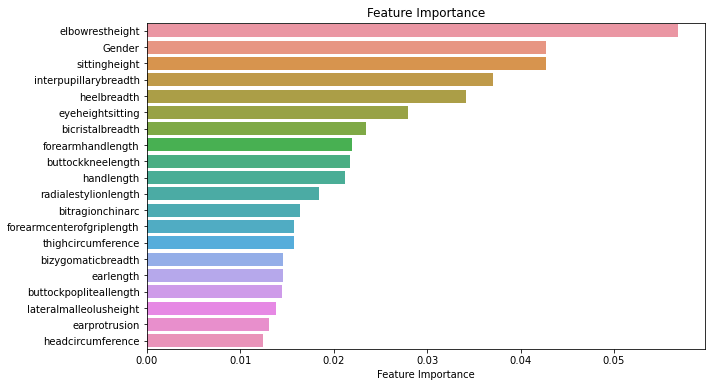

In [96]:
sns.barplot(x=xgb_feature_imp["Feature Importance"].head(20), y=xgb_feature_imp.index[:20])
plt.title("Feature Importance")
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [97]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [98]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [99]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [100]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [101]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [102]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [103]:
y_resampled_under

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [104]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

## SVC Over/Under Sampling

In [105]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [106]:
param_grid = {
    'C': np.linspace(50, 200, 4),
    'decision_function_shape': ['ovr'],  #'ovo'
    'gamma': ["scale", "auto", 1, 2],
    'kernel': ['rbf'],
    'class_weight': ["balanced", None]
}
f1_scoresSVC = make_scorer(f1_score, average=None, labels=["f1_scoresSVC"])
f1_score_weighed = make_scorer(f1_score, average="weighted")

model = SVC()
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=1,
                              scoring=f1_score_weighed,
                              refit=True,
                              n_jobs=-1)

svm_model_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 50., 100., 150., 200.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto', 1, 2], 'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

## Xgboost Over/ Under Sampling

In [107]:
param_grid = {
    "n_estimators": [100, 300],
    'max_depth': [6, 8],
    "learning_rate": [0.1, 0.3],
    "subsample": [0.5],
    "colsample_bytree": [0.5, 1]
}

xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model,
                              param_grid,
                              scoring=f1_scoresSVC,
                              n_jobs=-1,
                              refit=True,
                              verbose=2).fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[15:06:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [108]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.5}

In [109]:
y_pred_train = xgb_grid_model.predict(X_train)
y_pred_test = xgb_grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[   0    0    0    0]
 [1043   29   52    0]
 [  33  358    9    0]
 [ 110   25   72    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.07      0.03      0.04      1124
           2       0.07      0.02      0.03       400
           3       0.00      0.00      0.00       207

    accuracy                           0.02      1731
   macro avg       0.03      0.01      0.02      1731
weighted avg       0.06      0.02      0.03      1731



In [110]:
accuracy_score(y_train, y_pred_train)

0.9905894006934126

In [111]:
accuracy_score(y_test, y_pred_test)

0.0219526285384171

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [112]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred_test)

-0.30754877163629124

In [113]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred_test)

-0.18165191105261802

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [114]:
 !pip install shap

In [115]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [116]:
 shap_values

[array([[-1.73793590e-03,  1.59056293e-01,  1.86772917e-02,
          2.96588303e-01,  2.97313054e-02, -1.42511858e-01,
          1.01876573e-02, -1.57074053e-01,  1.44546990e-01,
         -6.73515557e-02, -6.92142499e-02, -1.58814975e-01,
          3.96509183e-03, -7.43829804e-02, -5.49877561e-04,
          4.78286424e-02, -3.98746631e-03,  1.79957277e-03,
          2.49429877e-03,  1.18942073e-01,  7.26319031e-03,
         -3.00214193e-02, -1.50252001e-01,  8.30978870e-03,
         -4.46338230e-02, -1.17451131e-02,  4.64002943e-02,
          1.87614293e-02,  1.13652878e-01, -5.19845863e-02,
          3.84664394e-01, -8.82396318e-02, -8.87254784e-02,
         -2.67115338e-01,  7.71865308e-03,  1.46984748e-02,
         -1.68548538e-01,  2.16893860e-03,  1.93264760e-01,
          9.59292898e-02, -8.87817536e-02,  1.15499860e-01,
         -1.67195008e-01,  2.66157220e-01, -2.49852975e-01,
          9.43252924e-02,  1.49950815e-02, -4.76811726e-02,
          1.01677293e-01, -2.04320157e-0

In [117]:
print(shap_values[0].shape)

(1, 87)


In [118]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: 1


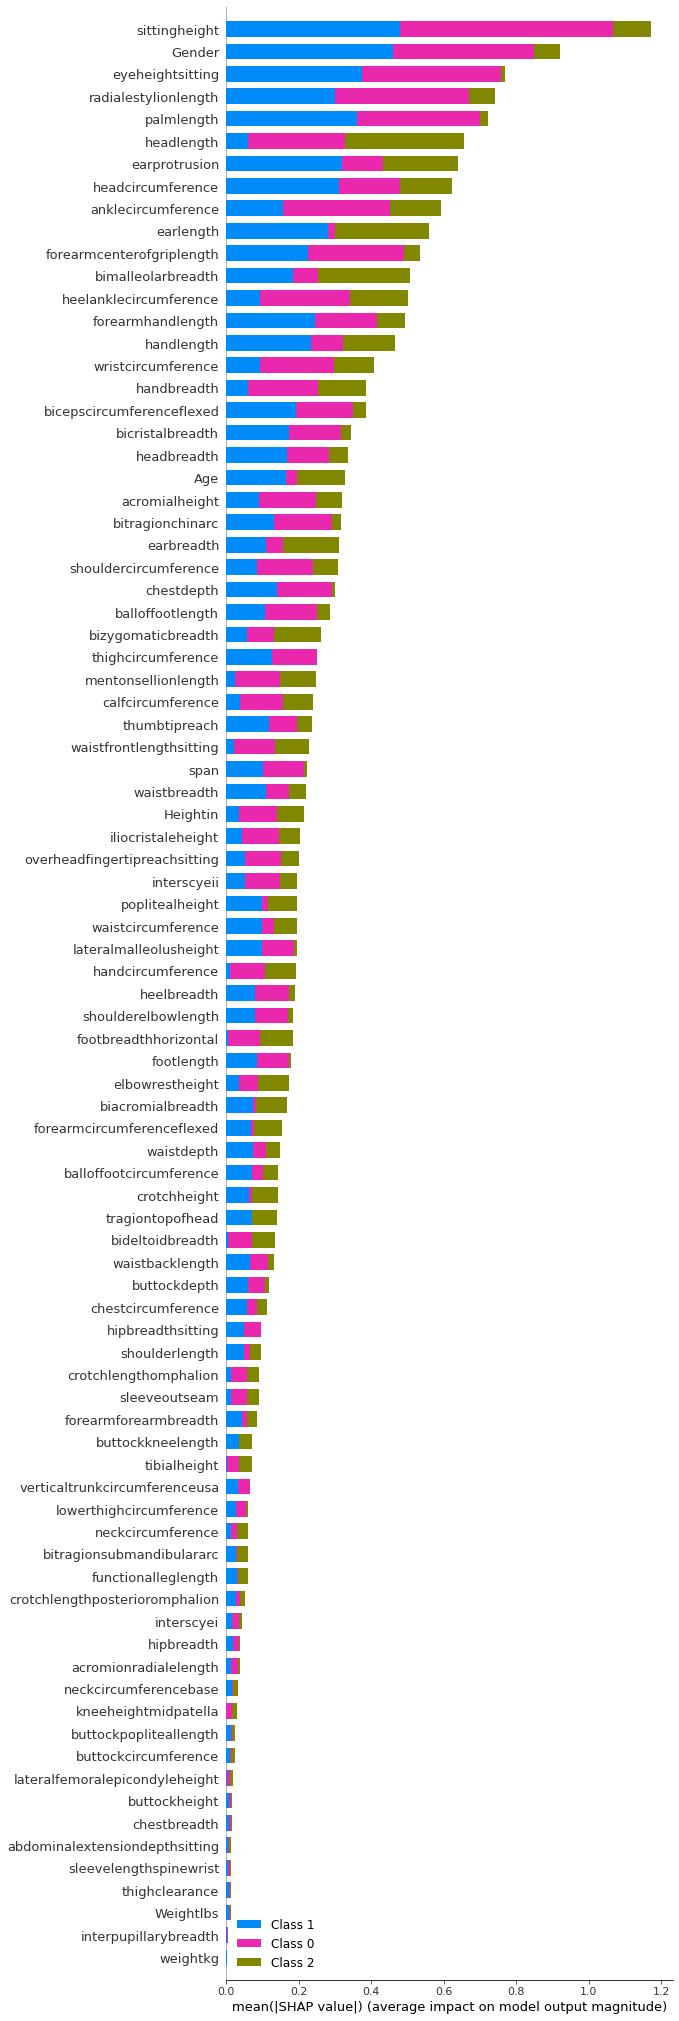

In [119]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [168]:
y2= y.map({3:1, 1:0, 2:0})
y2

0       0
1       0
2       0
3       0
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [169]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y2)

In [170]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)

In [171]:
pipe_shap_model2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [172]:
eval_metric(pipe_shap_model2, X_train2, y_train2, X_test2, y_test2)

Test_Set_Scores 
----------------
[[586  16 156]
 [  4 233  23]
 [ 21  13 102]]
              precision    recall  f1-score   support

           1       0.96      0.77      0.86       758
           2       0.89      0.90      0.89       260
           3       0.36      0.75      0.49       136

    accuracy                           0.80      1154
   macro avg       0.74      0.81      0.75      1154
weighted avg       0.87      0.80      0.82      1154


Train_Set_Scores 
----------------
[[2447   60  527]
 [  29  945   64]
 [ 101   46  396]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.87      3034
           2       0.90      0.91      0.90      1038
           3       0.40      0.73      0.52       543

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.76      4615
weighted avg       0.87      0.82      0.84      4615

